# CNN-based age prediction from face images

You need to perform age prediction from the face dataset provided to you.

The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg

    [age] is an integer from 0 to 116, indicating the age
    [gender] is either 0 (male) or 1 (female)
    [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
    [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected
 
Download dataset: https://www.dropbox.com/s/dwjilsgcgxwb2ls/face-dataset.zip?dl=0

You need to:
 1. Peform age prediction using CNN-based deep learning architecture
 2. Report the results with appropriate measures (like MSE, MAE)
 3. Please make sure to **randomly** assign 15% of the training set as validation data for hyper-parameter tuning and another 15% as test data. 
 4. Use random seed '777' whereever needed (like taking out 15% data from training set as validation and test set) for reproducability.

## Bonus: Perform gender prediction using the same dataset

# Age

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import os
import random
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import cv2
from imutils import paths

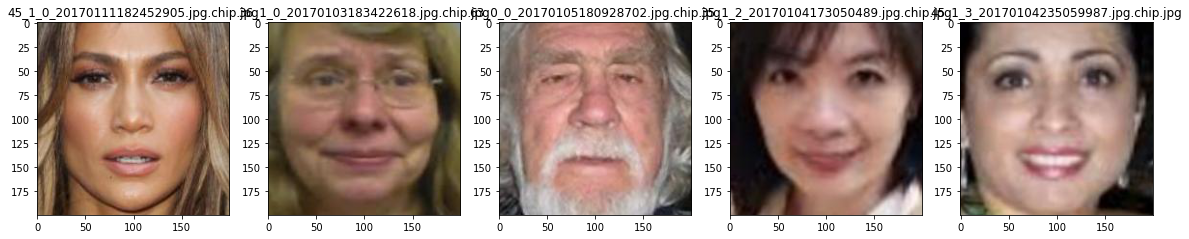

In [2]:
plt.figure(figsize=(20,20))
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'face-dataset'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)
    

In [3]:
Face_Labels = set(['Age', 'Gender','Race','Date & Time'])
pathToImages = list(paths.list_images(img_folder))
data = []
labels = [] #age
i = 0
for images in pathToImages:
        label = int(os.path.basename(pathToImages[i]).split('_')[0])
        image = cv2.imread(images)
        #image = cv2.cvtColor(image, cv2.COLOR_BGRTORGB)
        image = cv2.resize(image, (244,244))
        data.append(image)
        labels.append(label)
        i+=1

In [4]:
data = np.array(data)
data.shape


(9780, 244, 244, 3)

In [5]:
(unique, counts) = np.unique(labels, return_counts=True)
labels = np.array(labels)
print(labels.shape)
print (unique)
print (counts)
print (unique.shape)

(9780,)
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 110]
[1112  475  284  260  180  114  126  236  159  140   63  106   75  137
  143  212  103  181   58  103  136  139   92  191  156  279  126  145
  150  109   97  141   46   87  121  112   94   91  136   85   56   84
   52   27   77   61   70   64   99  105   62  133  133  106   52  132
   60   96   59  137   50   76   47   29  113   54   47   58   45   53
   22   70   31   16   87   35   19   30   16   71   10   29    7   11
  130   23    4   17   16   56    1   13    3    3   16    2    2    1
    2]
(99,)


In [6]:
from sklearn.preprocessing import LabelBinarizer
#One-Hot Encoding
labels = LabelBinarizer().fit_transform(labels)

In [7]:
print(labels)
print(labels.shape)

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(9780, 99)


In [8]:
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.15, random_state=777)


In [9]:
from tensorflow.keras import layers
inputs = keras.Input(shape=(244,244,3))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(99, activation=None)(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [10]:
model.summary()

model.compile(
    loss = 'MeanSquaredError',
    optimizer='rmsprop', 
    metrics=['accuracy']  
)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 244, 244, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 242, 242, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 240, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 118, 118, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 116, 116, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 64)        0     

In [11]:
callbacks = [keras.callbacks.ModelCheckpoint(
            filepath = 'convnet_from_scratch.keras',
            save_best_only = True,
            monitor = 'val_loss')
            ]

In [ ]:
history = model.fit(X_train, Y_train, 
                    epochs=5, batch_size = 64, 
                    callbacks=callbacks, validation_split = 0.2)

Epoch 1/5
104/104 [==============================] - 1261s 12s/step - loss: 14373.7396 - accuracy: 0.0498 - val_loss: 0.0100 - val_accuracy: 0.1185
Epoch 2/5
104/104 [==============================] - 1718s 17s/step - loss: 0.0099 - accuracy: 0.1061 - val_loss: 0.0127 - val_accuracy: 0.0174
Epoch 3/5
 77/104 [=====================>........] - ETA: 10:10 - loss: 15.6920 - accuracy: 0.0742

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_a = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label = "Training accuracy")
plt.plot(epochs, val_a, label = "Validation accuracy ")
plt.legend()
plt.figure()
plt.plot(epochs, loss, label = "Training loss")
plt.plot(epochs, val_a, label = "Validation loss")
plt.legend()
plt.figure()

# By Gender (Code only, did not finish epochs due to long computation time) - Would have exceeded submission deadline.

## For Gender, Sigmoid in output neuron, since Male or Female.


In [ ]:
Face_Labels = set(['Age', 'Gender','Race','Date & Time'])
pathToImages = list(paths.list_images(img_folder))
data = []
labels = []
i = 0
for images in pathToImages:
        label = int(os.path.basename(pathToImages[i]).split('_')[1])
        image = cv2.imread(images)
        #image = cv2.cvtColor(image, cv2.COLOR_BGRTORGB)
        image = cv2.resize(image, (244,244))
        data.append(image)
        labels.append(label)
        i+=1

In [ ]:
print(labels)
print(np.shape(labels))

In [ ]:
(unique, counts) = np.unique(labels, return_counts=True)
labels = np.array(labels)
print(labels.shape)
print (unique)
print (counts)
print (unique.shape)

In [ ]:
#One-Hot Encoding
labels = LabelBinarizer().fit_transform(labels)

In [ ]:
print(labels)
print(labels.shape)

In [ ]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.15, random_state=777)

In [ ]:
from tensorflow.keras import layers
inputs = keras.Input(shape=(244,244,3))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
model.summary()

model.compile(
    loss = 'MeanSquaredError',
    optimizer='rmsprop', 
    metrics=['accuracy']  
)

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(
            filepath = 'convnet_from_scratch.keras',
            save_best_only = True,
            monitor = 'val_loss')
            ]

In [ ]:
history = model.fit(X_train, Y_train, 
                    epochs=5, batch_size = 64, 
                    callbacks=callbacks, validation_split = 0.2)

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_a = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label = "Training accuracy")
plt.plot(epochs, val_a, label = "Validation accuracy ")
plt.legend()
plt.figure()
plt.plot(epochs, loss, label = "Training loss")
plt.plot(epochs, val_a, label = "Validation loss")
plt.legend()
plt.figure()